In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


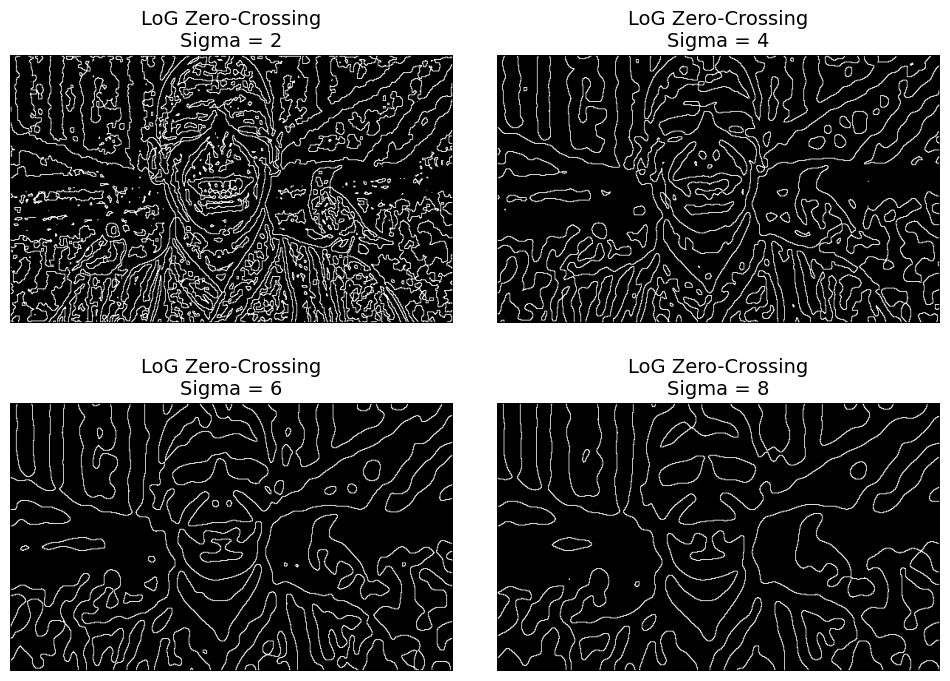

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray
import imageio.v3 as imageio

def any_neighbor_zero(img, i, j):
    """ Mengecek apakah ada piksel tetangga dengan nilai nol. """
    for k in range(-1, 2):
        for l in range(-1, 2):
            if k == 0 and l == 0:
                continue  # Skip pixel utama
            if img[i+k, j+l] == 0:
                return True
    return False

def zero_crossing(img):
    """ Mendeteksi zero-crossing dalam gambar hasil filter LoG. """
    img[img > 0] = 1
    img[img < 0] = 0

    out_img = np.zeros(img.shape)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            if img[i, j] > 0 and any_neighbor_zero(img, i, j):
                out_img[i, j] = 255

    return out_img.astype(np.uint8)

img = rgb2gray(imageio.imread('/content/drive/MyDrive/images/Voldi.jpg'))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.gray()

for idx, sigma in enumerate(range(2, 10, 2)):
    ax = axes[idx // 2, idx % 2]
    result = ndimage.gaussian_laplace(img, sigma=sigma)
    result = zero_crossing(result)
    ax.imshow(result, aspect='auto')
    ax.axis("off")
    ax.set_title(f"LoG Zero-Crossing\nSigma = {sigma}", fontsize=14)

plt.subplots_adjust(wspace=0.1, hspace=0.3)  #
plt.show()
